# Class #1

We first import the necessary python modules: we use the data analysis library "pandas" and statsmodels

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

/Users/fcastro/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


We read the data set as a data frame and print its head

In [3]:
df = pd.read_csv('red_meat.csv')
df.head()

,id,red_meat,cardiac_risk,male_dummy,female_dummy,smoking
0,1,4.615426,6.287400,0,1,1.384628
1,2,3.179725,4.813164,1,0,0.953918
2,3,3.433238,4.592836,1,0,1.029972
3,4,4.110157,2.084957,0,1,0.000000
4,5,3.418863,5.317896,1,0,0.000000


We run a simple regression

In [11]:
model  = smf.ols(formula = 'cardiac_risk ~ red_meat',data=df) 
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           cardiac_risk   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     264.5
Date:                Wed, 05 Jan 2022   Prob (F-statistic):           6.12e-53
Time:                        16:13:22   Log-Likelihood:                -1658.2
No. Observations:                1000   AIC:                             3320.
Df Residuals:                     998   BIC:                             3330.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3791      0.080     41.994      0.0

We can also obtain the coefficients and SE using the following

In [16]:
#coefficients
print(result.params)
#SE
print(result.bse)

Intercept    3.379053
red_meat     0.318688
dtype: float64
Intercept    0.080465
red_meat     0.019594
dtype: float64


We construct a scatter plot and add the regression line

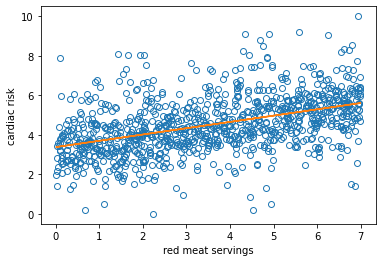

In [7]:
x = df['red_meat']
y = df['cardiac_risk']
plt.plot(x, y, 'o',mfc = 'none') #scatter plot
intercept = result.params[0]
red_meat_coef = result.params[1]
plt.plot(x, intercept + red_meat_coef*x) #regression line
plt.xlabel("red meat servings")
plt.ylabel("cardiac risk")
plt.show()

**Q:** Run a regression of cardiac risk on smoking (packs per day). Interpret the intercept and the coefficient estimate on smoking


In [8]:
model_smoking  = smf.ols(formula = 'cardiac_risk ~ smoking',data=df) 
result_smoking = model_smoking.fit()
print(result_smoking.summary())

                            OLS Regression Results                            
Dep. Variable:           cardiac_risk   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     332.6
Date:                Wed, 05 Jan 2022   Prob (F-statistic):           2.34e-64
Time:                        13:12:13   Log-Likelihood:                -1631.9
No. Observations:                1000   AIC:                             3268.
Df Residuals:                     998   BIC:                             3278.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5650      0.065     54.787      0.0

We run a regression with meat and meat^2

In [ ]:
model_squared = smf.ols(formula = 'cardiac_risk ~  red_meat + np.power(red_meat,2) ',data = df) 
res_squared   = model_squared.fit()
print(res_squared.summary())

**Binary X: Dummy varible**

Run a regression of cardiac risk on the female_dummy (variable=1 if respondent is female, 0 otherwise) OR on the male_dummy (not both, because of multicollinearity)



In [9]:
model_female = smf.ols(formula = 'cardiac_risk ~ female_dummy',data = df)
res_female   = model_female.fit()
print(res_female.summary())

                            OLS Regression Results                            
Dep. Variable:           cardiac_risk   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     9.055
Date:                Wed, 05 Jan 2022   Prob (F-statistic):            0.00269
Time:                        13:19:36   Log-Likelihood:                -1771.2
No. Observations:                1000   AIC:                             3546.
Df Residuals:                     998   BIC:                             3556.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.4048      0.058     76.538   

In [10]:
model_male = smf.ols(formula = 'cardiac_risk ~ male_dummy',data = df)
res_male   = model_male.fit()
print(res_male.summary())

                            OLS Regression Results                            
Dep. Variable:           cardiac_risk   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     9.055
Date:                Wed, 05 Jan 2022   Prob (F-statistic):            0.00269
Time:                        13:19:38   Log-Likelihood:                -1771.2
No. Observations:                1000   AIC:                             3546.
Df Residuals:                     998   BIC:                             3556.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6828      0.072     64.788      0.0